<a href="https://colab.research.google.com/github/Juethro/Steam-topseller_analyzing/blob/main/steam_seller_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KELOMPOK 8

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns',None)

In [ ]:
url = "https://raw.githubusercontent.com/masten57/datascrapesteam/main/main_steam.csv"
df = pd.read_csv(url)
df.head()

,title,base_price,os_support,discount,release,genres,dlc,developer,publisher,features,total_review,storage,metacritic,sum_rating
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,-0%,"17 Aug, 2020",Simulation,no,Asobo Studio,Asobo Studio,"Single-player, Steam Achievements, Full contro...",45275,150.0,91.0,Very Positive
1,Darkest Dungeon® II,299999.0,win,-0%,"8 May, 2023","Indie, RPG, Strategy",no,Red Hook Studios,Red Hook Studios,"Single-player, Steam Achievements, Steam Tradi...",7413,NaN,82.0,Mostly Positive
2,Farlight 84,0.0,win,-0%,"23 Apr, 2023","Action, Adventure, Free to Play, Massively Mul...",no,Farlight Games,Farlight Games,"Online PvP, Online Co-op, Cross-Platform Multi...",5285,10.0,NaN,Very Positive
3,DARK SOULS™: REMASTERED,420000.0,win,-0%,"23 May, 2018",Action,no,QLOC,Bandai Namco Entertainment,"Single-player, Steam Achievements, Full contro...",50804,8.0,84.0,Very Positive
4,Sniper Elite 5,209999.0,win,-0%,"25 May, 2022","Action, Adventure",no,Rebellion,Rebellion,"Single-player, Online PvP, Online Co-op, Cross...",8402,85.0,79.0,Mostly Positive


# DATA UNDERSTANDING

### MISSING VALUES

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

title             0
base_price      275
os_support        0
discount          0
release           2
genres            5
dlc               0
developer         0
publisher         0
features          7
total_review      0
storage         408
metacritic      874
sum_rating        0
dtype: int64


### Remap Sum_rating

In [ ]:
df.sum_rating.unique()

array(['Very Positive', 'Mostly Positive', 'Overwhelmingly Positive',
       'Mixed', '5 user reviews', 'Positive', 'Mostly Negative',
       '9 user reviews', '4 user reviews', '6 user reviews',
       '2 user reviews', '8 user reviews'], dtype=object)

In [ ]:
df.sum_rating.value_counts()

Very Positive              734
Mostly Positive            196
Overwhelmingly Positive    177
Mixed                      161
Positive                    13
Mostly Negative              8
8 user reviews               3
9 user reviews               2
6 user reviews               2
2 user reviews               2
5 user reviews               1
4 user reviews               1
Name: sum_rating, dtype: int64

In [ ]:
# Melakukan pelabelan ulang
label_mapping = {
    'Very Positive': 'Very Positive',
    'Mostly Positive': 'Positive',
    'Overwhelmingly Positive': 'Very Positive',
    'Mixed': 'Neutral',
    'Positive': 'Positive',
    'Mostly Negative': 'Negative',
    '8 user reviews': 'Neutral',
    '9 user reviews': 'Neutral',
    '6 user reviews': 'Neutral',
    '2 user reviews': 'Neutral',
    '5 user reviews': 'Neutral',
    '4 user reviews': 'Neutral'
}
df['sum_rating'] = df['sum_rating'].map(label_mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
encoder = LabelEncoder()

# Melakukan encoding pada kolom 'sum_rating'
df['sum_rating_encoded'] = encoder.fit_transform(df['sum_rating'])

# Hapus Metacritic, jelek soalnya
df = df.drop('sum_rating', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1300 non-null   object 
 1   base_price          1025 non-null   float64
 2   os_support          1300 non-null   object 
 3   discount            1300 non-null   object 
 4   release             1298 non-null   object 
 5   genres              1295 non-null   object 
 6   dlc                 1300 non-null   object 
 7   developer           1300 non-null   object 
 8   publisher           1300 non-null   object 
 9   features            1293 non-null   object 
 10  total_review        1300 non-null   int64  
 11  storage             892 non-null    float64
 12  metacritic          426 non-null    float64
 13  sum_rating_encoded  1300 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 142.3+ KB


In [ ]:
df.sum_rating_encoded.value_counts()

3    911
2    209
1    172
0      8
Name: sum_rating_encoded, dtype: int64

### Metacritic

In [ ]:
missing_percentage = df['metacritic'].isna().mean() * 100
print(f"Percentage of missing values in 'metacritic': {missing_percentage:.2f}%")

Percentage of missing values in 'metacritic': 67.23%


In [ ]:
# Hapus Metacritic, jelek soalnya
df = df.drop('metacritic', axis=1)
df

,title,base_price,os_support,discount,release,genres,dlc,developer,publisher,features,total_review,storage,sum_rating_encoded
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,-0%,"17 Aug, 2020",Simulation,no,Asobo Studio,Asobo Studio,"Single-player, Steam Achievements, Full contro...",45275,150.0,3
1,Darkest Dungeon® II,299999.0,win,-0%,"8 May, 2023","Indie, RPG, Strategy",no,Red Hook Studios,Red Hook Studios,"Single-player, Steam Achievements, Steam Tradi...",7413,NaN,2
2,Farlight 84,0.0,win,-0%,"23 Apr, 2023","Action, Adventure, Free to Play, Massively Mul...",no,Farlight Games,Farlight Games,"Online PvP, Online Co-op, Cross-Platform Multi...",5285,10.0,3
3,DARK SOULS™: REMASTERED,420000.0,win,-0%,"23 May, 2018",Action,no,QLOC,Bandai Namco Entertainment,"Single-player, Steam Achievements, Full contro...",50804,8.0,3
4,Sniper Elite 5,209999.0,win,-0%,"25 May, 2022","Action, Adventure",no,Rebellion,Rebellion,"Single-player, Online PvP, Online Co-op, Cross...",8402,85.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Growing Up,130999.0,"win, mac",-0%,"13 Oct, 2021","Casual, Indie, RPG, Simulation, Strategy",no,Vile Monarch,Vile Monarch,"Single-player, Steam Achievements, Steam Cloud",2178,2.0,3
1296,ENDER LILIES: Quietus of the Knights,119999.0,win,-0%,"21 Jun, 2021","Action, Indie, RPG",no,"Live Wire, Adglobe",Adglobe,"Single-player, Steam Achievements, Full contro...",23306,2.0,3
1297,Creepy Tale 3: Ingrid Penance,NaN,"win, mac, linux",-30.0,"9 Mar, 2023","Adventure, Indie",no,Creepy Brothers,Creepy Brothers,"Single-player, Steam Achievements, Full contro...",192,7.0,3
1298,Placid Plastic Duck Simulator,17499.0,win,-0%,"6 Jul, 2022","Casual, Simulation",no,turbolento games,turbolento games,"Single-player, Online Co-op, Steam Achievement...",7348,0.5,3


### Developer

In [ ]:
developer_counts = df['developer'].value_counts()
print(developer_counts)

Valve                                                11
Jackbox Games, Inc.                                  10
KOEI TECMO GAMES CO., LTD.                           10
CAPCOM Co., Ltd.                                      8
Square Enix                                           8
                                                     ..
Fictiorama Studios, BadLand Games Publishing S.L.     1
Chromatic Games                                       1
Nornec                                                1
Forward Development, Ltd.                             1
Creepy Brothers                                       1
Name: developer, Length: 1047, dtype: int64


In [ ]:
# Hapus kolom 'developer' dari df
df = df.drop('developer', axis=1)

### Discount

In [ ]:
df.discount.head()

0    -0%
1    -0%
2    -0%
3    -0%
4    -0%
Name: discount, dtype: object

In [ ]:
# Menghilangkan simbol persen
df['discount'] = df['discount'].str.replace('%', '')

# Menghilangkan tanda negatif
df['discount'] = df['discount'].str.replace('-', '')

# Mengubah tipe data menjadi numerik
df['discount'] = pd.to_numeric(df['discount'])

# Menampilkan hasil
print(df['discount'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1295     0.0
1296     0.0
1297    30.0
1298     0.0
1299    75.0
Name: discount, Length: 1300, dtype: float64


### DLC

In [ ]:
# Hapus kolom 'dlc' dari df
df = df.drop('dlc', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1300 non-null   object 
 1   base_price          1025 non-null   float64
 2   os_support          1300 non-null   object 
 3   discount            1300 non-null   float64
 4   release             1298 non-null   object 
 5   genres              1295 non-null   object 
 6   publisher           1300 non-null   object 
 7   features            1293 non-null   object 
 8   total_review        1300 non-null   int64  
 9   storage             892 non-null    float64
 10  sum_rating_encoded  1300 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 111.8+ KB


### Publisher

In [ ]:
# Hapus kolom 'developer' dari df
df = df.drop('publisher', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1300 non-null   object 
 1   base_price          1025 non-null   float64
 2   os_support          1300 non-null   object 
 3   discount            1300 non-null   float64
 4   release             1298 non-null   object 
 5   genres              1295 non-null   object 
 6   features            1293 non-null   object 
 7   total_review        1300 non-null   int64  
 8   storage             892 non-null    float64
 9   sum_rating_encoded  1300 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 101.7+ KB


### Total Review

In [ ]:
# Hapus kolom 'total review' dari df
df = df.drop('total_review', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               1300 non-null   object 
 1   base_price          1025 non-null   float64
 2   os_support          1300 non-null   object 
 3   discount            1300 non-null   float64
 4   release             1298 non-null   object 
 5   genres              1295 non-null   object 
 6   features            1293 non-null   object 
 7   storage             892 non-null    float64
 8   sum_rating_encoded  1300 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 91.5+ KB


### Features

In [ ]:
features_counts = df['features'].value_counts()
print(features_counts)

Single-player, Steam Achievements, Full controller support, Steam Cloud                                                                                                                                                    54
Single-player, Steam Achievements, Full controller support, Steam Trading Cards, Steam Cloud                                                                                                                               48
Single-player                                                                                                                                                                                                              46
Single-player, Steam Cloud                                                                                                                                                                                                 23
Single-player, Steam Achievements, Steam Cloud                                                                  

In [ ]:
# Count the number of games with online PvP feature
online_pvp_count = df['features'].str.contains('Online PvP').sum()

# Count the number of games with single player feature
single_player_count = df['features'].str.contains('Single-player').sum()

# Count the number of games with Cross-Platform Multiplayer
Cross_Platform_Multiplayer = df['features'].str.contains('Cross-Platform Multiplayer').sum()

# Hitung jumlah game dengan fitur full controller support
full_controller_count = df['features'].str.contains('Full controller support').sum()

# Hitung jumlah game dengan fitur partial controller support
partial_controller_count = df['features'].str.contains('Partial Controller Support').sum()

# Cetak jumlah game
print("Online PvP Count:", online_pvp_count)
print("Single Player Count:", single_player_count)
print("Cross-Platform Multiplayer:", Cross_Platform_Multiplayer)
print("Full Controller Support Count:", full_controller_count)
print("Partial Controller Support Count:", partial_controller_count)

Online PvP Count: 419
Single Player Count: 1110
Cross-Platform Multiplayer: 172
Full Controller Support Count: 528
Partial Controller Support Count: 260


In [ ]:
# Create a new DataFrame for the dummy variables
dummy_df = pd.DataFrame()

# Create dummy variables for each feature
dummy_df['Online PvP'] = df['features'].str.contains('Online PvP').map({True: 1, False: 0})
dummy_df['Single Player'] = df['features'].str.contains('Single-player').map({True: 1, False: 0})
dummy_df['Cross-Platform Multiplayer'] = df['features'].str.contains('Cross-Platform Multiplayer').map({True: 1, False: 0})
dummy_df['Full controller support'] = df['features'].str.contains('Full controller support').map({True: 1, False: 0})
dummy_df['Partial Controller Support'] = df['features'].str.contains('Partial Controller Support').map({True: 1, False: 0})

# Concatenate the dummy DataFrame with the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

# Print the updated DataFrame
df.head()

,title,base_price,os_support,discount,release,genres,features,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,0.0,"17 Aug, 2020",Simulation,"Single-player, Steam Achievements, Full contro...",150.0,3,0.0,1.0,0.0,1.0,0.0
1,Darkest Dungeon® II,299999.0,win,0.0,"8 May, 2023","Indie, RPG, Strategy","Single-player, Steam Achievements, Steam Tradi...",NaN,2,0.0,1.0,0.0,0.0,0.0
2,Farlight 84,0.0,win,0.0,"23 Apr, 2023","Action, Adventure, Free to Play, Massively Mul...","Online PvP, Online Co-op, Cross-Platform Multi...",10.0,3,1.0,0.0,1.0,0.0,1.0
3,DARK SOULS™: REMASTERED,420000.0,win,0.0,"23 May, 2018",Action,"Single-player, Steam Achievements, Full contro...",8.0,3,0.0,1.0,0.0,1.0,0.0
4,Sniper Elite 5,209999.0,win,0.0,"25 May, 2022","Action, Adventure","Single-player, Online PvP, Online Co-op, Cross...",85.0,2,1.0,1.0,1.0,1.0,0.0


In [ ]:
# Hapus kolom 'features' dari df
df = df.drop('features', axis=1)
df

,title,base_price,os_support,discount,release,genres,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,0.0,"17 Aug, 2020",Simulation,150.0,3,0.0,1.0,0.0,1.0,0.0
1,Darkest Dungeon® II,299999.0,win,0.0,"8 May, 2023","Indie, RPG, Strategy",NaN,2,0.0,1.0,0.0,0.0,0.0
2,Farlight 84,0.0,win,0.0,"23 Apr, 2023","Action, Adventure, Free to Play, Massively Mul...",10.0,3,1.0,0.0,1.0,0.0,1.0
3,DARK SOULS™: REMASTERED,420000.0,win,0.0,"23 May, 2018",Action,8.0,3,0.0,1.0,0.0,1.0,0.0
4,Sniper Elite 5,209999.0,win,0.0,"25 May, 2022","Action, Adventure",85.0,2,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Growing Up,130999.0,"win, mac",0.0,"13 Oct, 2021","Casual, Indie, RPG, Simulation, Strategy",2.0,3,0.0,1.0,0.0,0.0,0.0
1296,ENDER LILIES: Quietus of the Knights,119999.0,win,0.0,"21 Jun, 2021","Action, Indie, RPG",2.0,3,0.0,1.0,0.0,1.0,0.0
1297,Creepy Tale 3: Ingrid Penance,NaN,"win, mac, linux",30.0,"9 Mar, 2023","Adventure, Indie",7.0,3,0.0,1.0,0.0,1.0,0.0
1298,Placid Plastic Duck Simulator,17499.0,win,0.0,"6 Jul, 2022","Casual, Simulation",0.5,3,0.0,1.0,0.0,0.0,0.0


### Genre

In [ ]:
genres_counts = df['genres'].value_counts()
print(genres_counts)

Action                                                                           70
Action, Adventure                                                                57
Action, Indie                                                                    41
Action, Adventure, Indie                                                         37
Strategy                                                                         36
                                                                                 ..
Action, Casual, Free to Play, Massively Multiplayer, Sports                       1
Action, Indie, Simulation, Sports                                                 1
Casual, Free to Play, Massively Multiplayer, Simulation, Strategy                 1
Casual, Free to Play, Indie, Massively Multiplayer, RPG, Simulation, Strategy     1
Action, Racing, Sports                                                            1
Name: genres, Length: 344, dtype: int64


In [ ]:
# Membuat kolom-kolom dummy berdasarkan nama-nama dalam kolom 'developer'
dummies0 = df['genres'].str.get_dummies(sep=', ')

# Menggabungkan DataFrame asli dengan kolom-kolom dummy
df = pd.concat([df, dummies0], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       1300 non-null   object 
 1   base_price                  1025 non-null   float64
 2   os_support                  1300 non-null   object 
 3   discount                    1300 non-null   float64
 4   release                     1298 non-null   object 
 5   genres                      1295 non-null   object 
 6   storage                     892 non-null    float64
 7   sum_rating_encoded          1300 non-null   int64  
 8   Online PvP                  1293 non-null   float64
 9   Single Player               1293 non-null   float64
 10  Cross-Platform Multiplayer  1293 non-null   float64
 11  Full controller support     1293 non-null   float64
 12  Partial Controller Support  1293 non-null   float64
 13  Action                      1300 

In [ ]:
# Hapus kolom 'genres' dari df
df = df.drop('genres', axis=1)
df

,title,base_price,os_support,discount,release,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Photo Editing,RPG,Racing,Simulation,Sports,Strategy,Utilities,Video Production,Web Publishing
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,0.0,"17 Aug, 2020",150.0,3,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,Darkest Dungeon® II,299999.0,win,0.0,"8 May, 2023",NaN,2,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,Farlight 84,0.0,win,0.0,"23 Apr, 2023",10.0,3,1.0,0.0,1.0,0.0,1.0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,DARK SOULS™: REMASTERED,420000.0,win,0.0,"23 May, 2018",8.0,3,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sniper Elite 5,209999.0,win,0.0,"25 May, 2022",85.0,2,1.0,1.0,1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Growing Up,130999.0,"win, mac",0.0,"13 Oct, 2021",2.0,3,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
1296,ENDER LILIES: Quietus of the Knights,119999.0,win,0.0,"21 Jun, 2021",2.0,3,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1297,Creepy Tale 3: Ingrid Penance,NaN,"win, mac, linux",30.0,"9 Mar, 2023",7.0,3,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1298,Placid Plastic Duck Simulator,17499.0,win,0.0,"6 Jul, 2022",0.5,3,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### OS Support

In [ ]:
os_counts = df['os_support'].value_counts()
print(os_counts)

win                863
win, mac, linux    234
win, mac           177
win, linux          26
Name: os_support, dtype: int64


In [ ]:
df['win'] = df['os_support'].apply(lambda x: 1 if 'win' in x else 0)
df['mac'] = df['os_support'].apply(lambda x: 1 if 'mac' in x else 0)
df['linux'] = df['os_support'].apply(lambda x: 1 if 'linux' in x else 0)

In [ ]:
df.head()

,title,base_price,os_support,discount,release,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Photo Editing,RPG,Racing,Simulation,Sports,Strategy,Utilities,Video Production,Web Publishing,win,mac,linux
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,win,0.0,"17 Aug, 2020",150.0,3,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Darkest Dungeon® II,299999.0,win,0.0,"8 May, 2023",NaN,2,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,Farlight 84,0.0,win,0.0,"23 Apr, 2023",10.0,3,1.0,0.0,1.0,0.0,1.0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,DARK SOULS™: REMASTERED,420000.0,win,0.0,"23 May, 2018",8.0,3,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sniper Elite 5,209999.0,win,0.0,"25 May, 2022",85.0,2,1.0,1.0,1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Hapus kolom 'os_support' dari df
df = df.drop('os_support', axis=1)
df

,title,base_price,discount,release,storage,sum_rating_encoded,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Animation & Modeling,Audio Production,Casual,Design & Illustration,Early Access,Education,Free to Play,Game Development,Indie,Massively Multiplayer,Photo Editing,RPG,Racing,Simulation,Sports,Strategy,Utilities,Video Production,Web Publishing,win,mac,linux
0,Microsoft Flight Simulator 40th Anniversary Ed...,790000.0,0.0,"17 Aug, 2020",150.0,3,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Darkest Dungeon® II,299999.0,0.0,"8 May, 2023",NaN,2,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
2,Farlight 84,0.0,0.0,"23 Apr, 2023",10.0,3,1.0,0.0,1.0,0.0,1.0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,DARK SOULS™: REMASTERED,420000.0,0.0,"23 May, 2018",8.0,3,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Sniper Elite 5,209999.0,0.0,"25 May, 2022",85.0,2,1.0,1.0,1.0,1.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Growing Up,130999.0,0.0,"13 Oct, 2021",2.0,3,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0
1296,ENDER LILIES: Quietus of the Knights,119999.0,0.0,"21 Jun, 2021",2.0,3,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1297,Creepy Tale 3: Ingrid Penance,NaN,30.0,"9 Mar, 2023",7.0,3,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1
1298,Placid Plastic Duck Simulator,17499.0,0.0,"6 Jul, 2022",0.5,3,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


### Title

In [ ]:
# Delete Title
df = df.drop('title', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  1025 non-null   float64
 1   discount                    1300 non-null   float64
 2   release                     1298 non-null   object 
 3   storage                     892 non-null    float64
 4   sum_rating_encoded          1300 non-null   int64  
 5   Online PvP                  1293 non-null   float64
 6   Single Player               1293 non-null   float64
 7   Cross-Platform Multiplayer  1293 non-null   float64
 8   Full controller support     1293 non-null   float64
 9   Partial Controller Support  1293 non-null   float64
 10  Action                      1300 non-null   int64  
 11  Adventure                   1300 non-null   int64  
 12  Animation & Modeling        1300 non-null   int64  
 13  Audio Production            1300 

### Release Date

In [ ]:
df = df.dropna(subset=['release'])

In [ ]:
# Mengubah kolom 'release_date' menjadi tipe data datetime
df['release'] = pd.to_datetime(df['release'])

# Mendapatkan informasi quartal dan tahun
df['quartal'] = df['release'].dt.quarter
df['year'] = df['release'].dt.year

# Mengubah tipe data kolom 'quartal' dan 'tahun' menjadi integer
df['quartal'] = df['quartal'].astype(int)
df['year'] = df['year'].astype(int)

# Menampilkan hasil
print(df[['quartal', 'year']])

      quartal  year
0           3  2020
1           2  2023
2           2  2023
3           2  2018
4           2  2022
...       ...   ...
1295        4  2021
1296        2  2021
1297        1  2023
1298        3  2022
1299        1  2016

[1298 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1298 entries, 0 to 1299
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   base_price                  1024 non-null   float64       
 1   discount                    1298 non-null   float64       
 2   release                     1298 non-null   datetime64[ns]
 3   storage                     892 non-null    float64       
 4   sum_rating_encoded          1298 non-null   int64         
 5   Online PvP                  1291 non-null   float64       
 6   Single Player               1291 non-null   float64       
 7   Cross-Platform Multiplayer  1291 non-null   float64       
 8   Full controller support     1291 non-null   float64       
 9   Partial Controller Support  1291 non-null   float64       
 10  Action                      1298 non-null   int64         
 11  Adventure                   1298 non-null   int64       

In [ ]:
# Hapus kolom 'release' dari df
df = df.drop('release', axis=1)

### Drop Kolom Bukan Game

In [ ]:
df.Utilities.unique()

array([0, 1])

In [ ]:
df = df.drop(df[df["Web Publishing"] == 1].index)
df = df.drop(df[df["Utilities"] == 1].index)
df = df.drop(df[df["Video Production"] == 1].index)
df = df.drop(df[df["Photo Editing"] == 1].index)
df = df.drop(df[df["Design & Illustration"] == 1].index)
df = df.drop(df[df["Audio Production"] == 1].index)
df = df.drop(df[df["Animation & Modeling"] == 1].index)
df = df.drop(df[df["Game Development"] == 1].index)

In [ ]:
# Checking
df["Animation & Modeling"].unique()

array([0])

In [ ]:
# Drop kolom bukan game
df = df.drop(['Web Publishing', 'Utilities', 'Video Production',
              'Photo Editing', 'Design & Illustration', 'Audio Production',
              'Animation & Modeling', 'Game Development', 'Education'], axis=1)

In [ ]:
# reset index df
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  1008 non-null   float64
 1   discount                    1281 non-null   float64
 2   storage                     882 non-null    float64
 3   sum_rating_encoded          1281 non-null   int64  
 4   Online PvP                  1281 non-null   float64
 5   Single Player               1281 non-null   float64
 6   Cross-Platform Multiplayer  1281 non-null   float64
 7   Full controller support     1281 non-null   float64
 8   Partial Controller Support  1281 non-null   float64
 9   Action                      1281 non-null   int64  
 10  Adventure                   1281 non-null   int64  
 11  Casual                      1281 non-null   int64  
 12  Early Access                1281 non-null   int64  
 13  Free to Play                1281 

# PREPROCESSING

## Split Data Prepo

In [ ]:
# import pandas as pd
# from sklearn.model_selection import KFold

# # Memisahkan fitur dan target dari DataFrame
# X = df.drop('sum_rating_encoded', axis=1)
# y = df['sum_rating_encoded']

# # Melakukan cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Menggunakan KFold dengan 5 splits

# # Menampilkan indeks train dan test set untuk setiap fold
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target dari DataFrame
X = df.drop('sum_rating_encoded', axis=1)  # Mengganti 'target' dengan nama kolom target yang sesuai
y = df['sum_rating_encoded']  # Mengganti 'target' dengan nama kolom target yang sesuai

# Melakukan split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 871 to 69
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  711 non-null    float64
 1   discount                    896 non-null    float64
 2   storage                     613 non-null    float64
 3   Online PvP                  896 non-null    float64
 4   Single Player               896 non-null    float64
 5   Cross-Platform Multiplayer  896 non-null    float64
 6   Full controller support     896 non-null    float64
 7   Partial Controller Support  896 non-null    float64
 8   Action                      896 non-null    int64  
 9   Adventure                   896 non-null    int64  
 10  Casual                      896 non-null    int64  
 11  Early Access                896 non-null    int64  
 12  Free to Play                896 non-null    int64  
 13  Indie                       896 no

In [ ]:
y_train.value_counts()

3    627
2    144
1    120
0      5
Name: sum_rating_encoded, dtype: int64

## Analisis Missing Values

### Combined X_train + y_train

In [ ]:
# Menggabungkan X_train dan y_train
comb = pd.concat([X_train, y_train], axis=1)

### Combined X_test + y_test

In [ ]:
# Menggabungkan X_train dan y_train
comb_test = pd.concat([X_test, y_test], axis=1)

### Missing Values

In [ ]:
# comb_train check
missing = comb.isna().sum()
print(missing)

base_price                    185
discount                        0
storage                       283
Online PvP                      0
Single Player                   0
Cross-Platform Multiplayer      0
Full controller support         0
Partial Controller Support      0
Action                          0
Adventure                       0
Casual                          0
Early Access                    0
Free to Play                    0
Indie                           0
Massively Multiplayer           0
RPG                             0
Racing                          0
Simulation                      0
Sports                          0
Strategy                        0
win                             0
mac                             0
linux                           0
quartal                         0
year                            0
sum_rating_encoded              0
dtype: int64


In [ ]:
# comb_test check
missing = comb_test.isna().sum()
print(missing)

base_price                     88
discount                        0
storage                       116
Online PvP                      0
Single Player                   0
Cross-Platform Multiplayer      0
Full controller support         0
Partial Controller Support      0
Action                          0
Adventure                       0
Casual                          0
Early Access                    0
Free to Play                    0
Indie                           0
Massively Multiplayer           0
RPG                             0
Racing                          0
Simulation                      0
Sports                          0
Strategy                        0
win                             0
mac                             0
linux                           0
quartal                         0
year                            0
sum_rating_encoded              0
dtype: int64


### Storage

In [ ]:
# Menghitung mean berdasarkan data train
median_by_group_train = comb.groupby('sum_rating_encoded')['storage'].median()
comb['storage'] = comb.groupby('sum_rating_encoded')['storage'].transform(lambda x: x.fillna(median_by_group_train[x.name]))

# Mengisi missing value pada data tes menggunakan mean dari data train
comb_test['storage'] = comb_test.groupby('sum_rating_encoded')['storage'].transform(lambda x: x.fillna(median_by_group_train[x.name]))


In [ ]:
# # Hitung mean sebelum imputasi
# mean_before = comb.groupby('sum_rating_encoded')['storage'].mean()
# print("Mean sebelum imputasi:")
# print(mean_before)

# # Lakukan imputasi menggunakan median
# storage_median = comb.groupby('sum_rating_encoded')['storage'].median()

# for index, row in comb.iterrows():
#     if pd.isnull(row['storage']):
#         comb.loc[index, 'storage'] = storage_median[row['sum_rating_encoded']]

# # Hitung mean setelah imputasi
# mean_after = comb.groupby('sum_rating_encoded')['storage'].mean()
# print("Mean setelah imputasi:")
# print(mean_after)

In [ ]:
# # Mengembalikan nilai awal dari kolom 'sum_rating_encoded' menggunakan inverse_transform
# comb['sum_rating'] = encoder.inverse_transform(comb['sum_rating_encoded'])

# # Menampilkan nilai unik dan jumlah setiap nilai pada kolom 'sum_rating'
# print(comb['sum_rating'].value_counts())

In [ ]:
# # Membalikkan transformasi label menjadi nilai asli
# labels = encoder.inverse_transform([0, 1, 2, 3])

# # Menampilkan hasil
# for i, label in enumerate(labels):
#     print(f"Label {i}: {label}")

In [ ]:
comb.storage.isna().sum()

0

In [ ]:
comb_test.storage.isna().sum()

0

### Base Price

In [ ]:
# Menghitung mean berdasarkan data train
mean_by_group_train = comb.groupby('sum_rating_encoded')['base_price'].mean()
comb['base_price'] = comb.groupby('sum_rating_encoded')['base_price'].transform(lambda x: x.fillna(mean_by_group_train[x.name]))

# Mengisi missing value pada data tes menggunakan mean dari data train
comb_test['base_price'] = comb_test.groupby('sum_rating_encoded')['base_price'].transform(lambda x: x.fillna(mean_by_group_train[x.name]))


In [ ]:
comb.base_price.isna().sum()

0

In [ ]:
comb_test.base_price.isna().sum()

0

## Analisis Outlier

### Storage

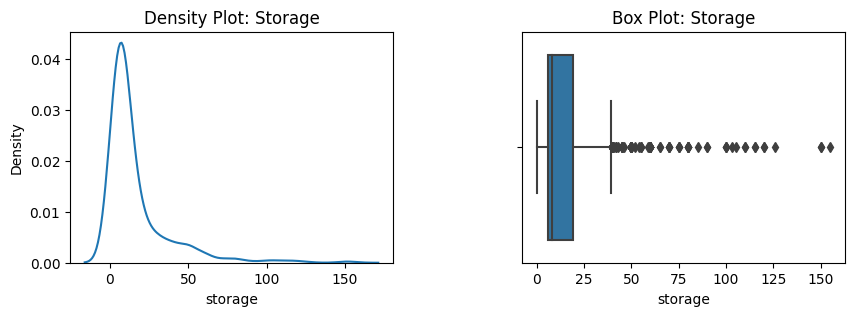

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['storage'], ax=axes[0])
axes[0].set_xlabel('storage')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Storage')

# Box plot
sns.boxplot(x=comb['storage'], ax=axes[1])
axes[1].set_xlabel('storage')
axes[1].set_title('Box Plot: Storage')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

In [ ]:
# # Menghitung batas atas dan batas bawah dari box plot
# Q1 = comb['storage'].quantile(0.25)
# Q3 = comb['storage'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Menghapus outlier berdasarkan box plot
# comb = comb[(comb['storage'] >= lower_bound) & (comb['storage'] <= upper_bound)]

In [ ]:
# # Membuat figure dan axes
# fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# # Density plot
# sns.kdeplot(data=comb['storage'], ax=axes[0])
# axes[0].set_xlabel('storage')
# axes[0].set_ylabel('Density')
# axes[0].set_title('Density Plot: Storage')

# # Box plot
# sns.boxplot(x=comb['storage'], ax=axes[1])
# axes[1].set_xlabel('storage')
# axes[1].set_title('Box Plot: Storage')

# # Mengatur jarak antara subplot
# plt.subplots_adjust(wspace=0.4)

# # Menampilkan density plot dan box plot
# plt.show()

### Base Price

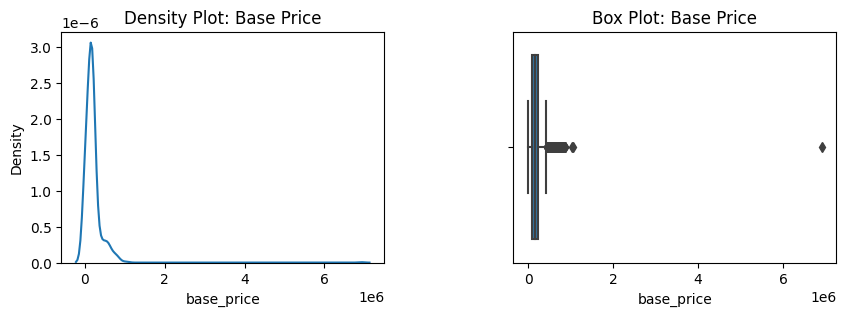

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['base_price'], ax=axes[0])
axes[0].set_xlabel('base_price')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Base Price')

# Box plot
sns.boxplot(x=comb['base_price'], ax=axes[1])
axes[1].set_xlabel('base_price')
axes[1].set_title('Box Plot: Base Price')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

### Discount

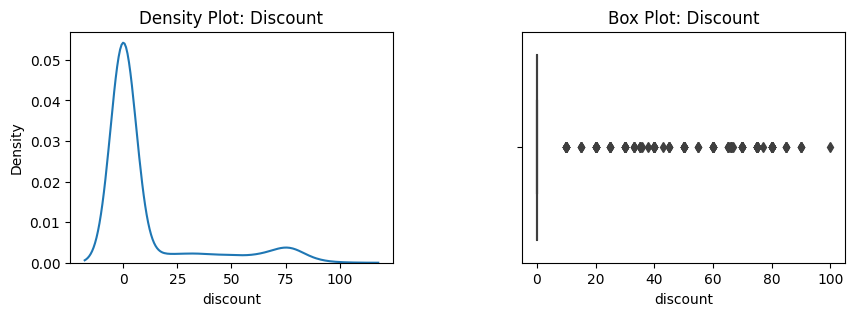

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['discount'], ax=axes[0])
axes[0].set_xlabel('discount')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Discount')

# Box plot
sns.boxplot(x=comb['discount'], ax=axes[1])
axes[1].set_xlabel('discount')
axes[1].set_title('Box Plot: Discount')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

## Isolation Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Memisahkan fitur dari DataFrame
XX = comb.drop(['base_price', 'discount', 'storage','sum_rating_encoded'], axis=1)

# Inisialisasi model Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Melatih model
isolation_forest.fit(XX)

# Melakukan prediksi anomali pada data
anomaly_scores = isolation_forest.decision_function(XX)
anomaly_labels = isolation_forest.predict(XX)

# Menampilkan hasil prediksi
comb['anomaly_score'] = anomaly_scores
comb['anomaly_label'] = anomaly_labels
comb

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded,anomaly_score,anomaly_label
871,196430.587771,80.0,105.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2018,3,0.127604,1
130,69999.000000,0.0,8.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,1998,3,0.037459,1
1055,47499.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,1,3,2022,3,-0.013501,-1
92,196430.587771,25.0,8.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,4,2022,3,0.130721,1
1119,196430.587771,33.0,3.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,4,2022,3,0.136814,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,56499.000000,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,4,2022,3,0.005880,1
1141,550000.000000,0.0,20.0,1.0,1.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,2018,2,0.123299,1
445,130999.000000,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,2,2023,1,0.058321,1
859,149000.000000,0.0,90.0,1.0,1.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2017,2,0.108002,1


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Memisahkan fitur dari DataFrame
YY = comb_test.drop(['base_price', 'discount', 'storage','sum_rating_encoded'], axis=1)

# Inisialisasi model Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Melatih model
isolation_forest.fit(YY)

# Melakukan prediksi anomali pada data
anomaly_scores = isolation_forest.decision_function(YY)
anomaly_labels = isolation_forest.predict(YY)

# Menampilkan hasil prediksi
comb_test['anomaly_score'] = anomaly_scores
comb_test['anomaly_label'] = anomaly_labels
comb_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded,anomaly_score,anomaly_label
550,450999.000000,0.0,26.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,3,2021,2,0.081025,1
632,196430.587771,33.0,15.0,1.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,2021,3,0.076484,1
383,69999.000000,0.0,8.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,3,2021,3,0.083486,1
339,209999.000000,0.0,20.0,1.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,3,2019,2,0.065655,1
484,0.000000,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,4,2021,2,0.000435,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,169900.000000,0.0,12.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,4,2012,3,0.042778,1
869,130999.000000,0.0,1.5,0.0,1.0,0.0,1.0,0.0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,2,2023,3,0.130289,1
134,196430.587771,80.0,0.6,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2018,3,0.127290,1
1149,99999.000000,0.0,15.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,1,2023,2,-0.010180,-1


## Transformasi

### Scaler Only

In [ ]:
# from sklearn.preprocessing import RobustScaler

# numm = ['storage', 'base_price', 'discount']
# scaler_num = RobustScaler()
# comb[numm] = scaler_num.fit_transform(comb[numm])

# # Scaling
# comb[numm] = scaler_num.transform(comb[numm])
# comb_test[numm] = scaler_num.transform(comb_test[numm])

### Robust Scaler & Log-transform

In [ ]:
# from sklearn.preprocessing import RobustScaler

# numm = ['storage', 'base_price', 'discount']
# scaler_num = RobustScaler()
# comb[numm] = scaler_num.fit_transform(comb[numm])

# # Scaling
# comb[numm] = scaler_num.transform(comb[numm])
# comb_test[numm] = scaler_num.transform(comb_test[numm])

# # Log transform
# comb[numm[0]] = np.log(comb[numm[0]])
# comb[numm[1]] = np.log(comb[numm[1]])
# comb[numm[2]] = np.log(comb[numm[2]])

In [ ]:
# comb

### Robust Scaler & Power Transform

In [ ]:
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import PowerTransformer

# numm = ['storage', 'base_price', 'discount']
# # scaling pada data numerik
# scaler_num = RobustScaler()
# # scaler = MinMaxScaler()
# comb[numm] = scaler_num.fit_transform(comb[numm])
# scaler_power = PowerTransformer()
# comb[numm] = scaler_power.fit_transform(comb[numm])

In [ ]:
# # apply the same scaler to test using train_sample as the fit
# comb[numm] = scaler_num.transform(comb[numm])
# comb_test[numm] = scaler_num.transform(comb_test[numm])


# comb[numm] = scaler_power.transform(comb[numm])
# comb_test[numm] = scaler_power.transform(comb_test[numm])

### Check storage

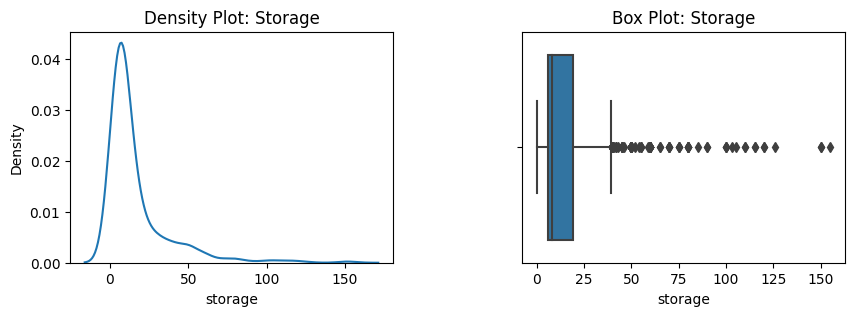

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['storage'], ax=axes[0])
axes[0].set_xlabel('storage')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Storage')

# Box plot
sns.boxplot(x=comb['storage'], ax=axes[1])
axes[1].set_xlabel('storage')
axes[1].set_title('Box Plot: Storage')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

### Check base price

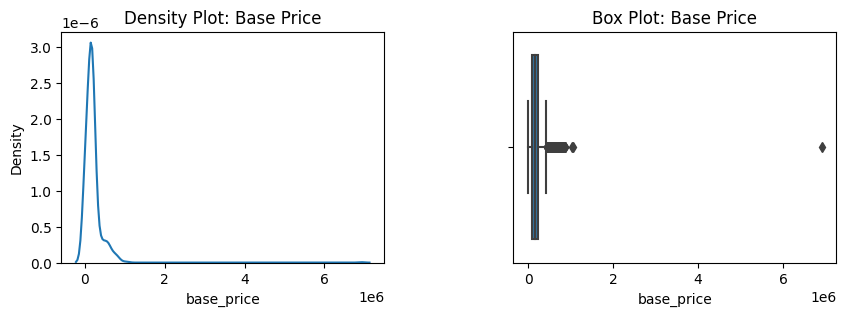

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['base_price'], ax=axes[0])
axes[0].set_xlabel('base_price')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Base Price')

# Box plot
sns.boxplot(x=comb['base_price'], ax=axes[1])
axes[1].set_xlabel('base_price')
axes[1].set_title('Box Plot: Base Price')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

### Check discount

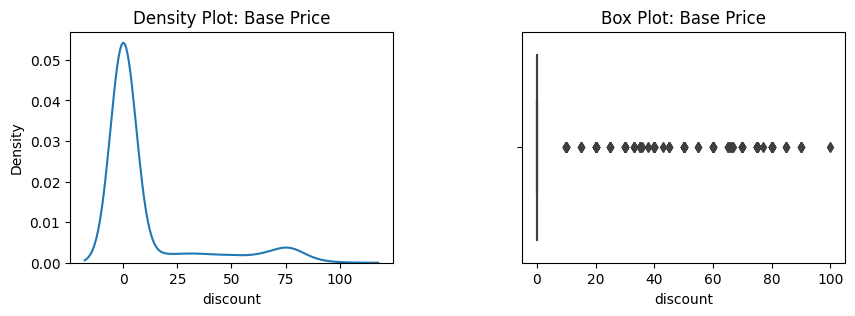

In [ ]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Density plot
sns.kdeplot(data=comb['discount'], ax=axes[0])
axes[0].set_xlabel('discount')
axes[0].set_ylabel('Density')
axes[0].set_title('Density Plot: Base Price')

# Box plot
sns.boxplot(x=comb['discount'], ax=axes[1])
axes[1].set_xlabel('discount')
axes[1].set_title('Box Plot: Base Price')

# Mengatur jarak antara subplot
plt.subplots_adjust(wspace=0.4)

# Menampilkan density plot dan box plot
plt.show()

## Combine Data Model

In [ ]:
# Gabungkan dengan df
df_preposed = pd.concat([comb, comb_test], axis=0, ignore_index=True)



## Bootstrap

In [ ]:
def bootstrap(data, target_col, n_iterations):
    bootstrap_samples = []

    # Bootstrap untuk label 0 dengan n_iterations 10
    target_values = [0]
    for target_value in target_values:
      target_data = data[data[target_col] == target_value]
      for _ in range(n_iterations):
          bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
          bootstrap_samples.append(bootstrap_sample)

    # Bootstrap untuk label 1, 2, 3 dengan n_iterations 5
    # target_values = []
    # for target_value in target_values:
    #     target_data = data[data[target_col] == target_value]
    #     for _ in range(5):
    #         bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
    #         bootstrap_samples.append(bootstrap_sample)

    return bootstrap_samples

# Contoh penggunaan
target_col = 'sum_rating_encoded'
n_iterations = 20

bootstrap_samples = bootstrap(df_preposed, target_col, n_iterations)

# Menggabungkan semua sampel bootstrap ke dalam satu DataFrame
bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)

# Gabungkan dengan df
df_preposed = pd.concat([df_preposed, bootstrap_df], axis=0, ignore_index=True)

# Menampilkan DataFrame hasil bootstrap
bootstrap_df

,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded,anomaly_score,anomaly_label
0,0.0,0.0,60.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,2,2020,0,0.010742,1
1,0.0,10.0,10.0,0.0,1.0,0.0,0.0,0.0,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,2,2023,0,0.122259,1
2,0.0,0.0,60.0,1.0,1.0,0.0,0.0,0.0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,2,2020,0,0.067890,1
3,0.0,0.0,35.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,2,2023,0,0.013173,1
4,0.0,0.0,35.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,2,2023,0,0.013173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.0,0.0,80.0,1.0,0.0,0.0,0.0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,2022,0,0.051904,1
156,0.0,0.0,60.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,2,2020,0,0.010742,1
157,0.0,0.0,60.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,2,2020,0,0.010742,1
158,0.0,0.0,35.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,2,2023,0,0.013173,1


In [ ]:
def bootstrap1(data, target_col, n_iterations):
    bootstrap_samples = []

    # Bootstrap untuk label 0 dengan n_iterations 10
    target_values = [1]
    for target_value in target_values:
      target_data = data[data[target_col] == target_value]
      for _ in range(n_iterations):
          bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
          bootstrap_samples.append(bootstrap_sample)

    # Bootstrap untuk label 1, 2, 3 dengan n_iterations 5
    # target_values = []
    # for target_value in target_values:
    #     target_data = data[data[target_col] == target_value]
    #     for _ in range(5):
    #         bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
    #         bootstrap_samples.append(bootstrap_sample)

    return bootstrap_samples

# Contoh penggunaan
target_col = 'sum_rating_encoded'
n_iterations = 20

bootstrap_samples = bootstrap1(df_preposed, target_col, n_iterations)

# Menggabungkan semua sampel bootstrap ke dalam satu DataFrame
bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)

# Gabungkan dengan df
df_preposed = pd.concat([df_preposed, bootstrap_df], axis=0, ignore_index=True)

# Menampilkan DataFrame hasil bootstrap
bootstrap_df

,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded,anomaly_score,anomaly_label
0,284999.000000,0.0,13.000,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,2023,1,0.103057,1
1,659000.000000,0.0,100.000,1.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,4,2021,1,0.037451,1
2,231155.255319,75.0,6.000,0.0,1.0,0.0,1.0,0.0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,1,3,2015,1,0.107350,1
3,549999.000000,0.0,14.000,1.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,2,2023,1,0.007715,1
4,231155.255319,40.0,1.000,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,3,2021,1,0.070009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,145999.000000,0.0,30.000,0.0,1.0,0.0,0.0,0.0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,2023,1,0.079634,1
3416,0.000000,0.0,4.196,1.0,0.0,1.0,0.0,0.0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0,4,2019,1,-0.014895,-1
3417,0.000000,0.0,50.000,1.0,0.0,0.0,0.0,0.0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,4,2017,1,0.050510,1
3418,0.000000,0.0,50.000,1.0,0.0,1.0,1.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,2021,1,0.034007,1


In [ ]:
def bootstrap2(data, target_col, n_iterations):
    bootstrap_samples = []

    # Bootstrap untuk label 0 dengan n_iterations 10
    target_values = [2]
    for target_value in target_values:
      target_data = data[data[target_col] == target_value]
      for _ in range(n_iterations):
          bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
          bootstrap_samples.append(bootstrap_sample)

    # Bootstrap untuk label 1, 2, 3 dengan n_iterations 5
    # target_values = []
    # for target_value in target_values:
    #     target_data = data[data[target_col] == target_value]
    #     for _ in range(5):
    #         bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
    #         bootstrap_samples.append(bootstrap_sample)

    return bootstrap_samples

# Contoh penggunaan
target_col = 'sum_rating_encoded'
n_iterations = 20

bootstrap_samples = bootstrap2(df_preposed, target_col, n_iterations)

# Menggabungkan semua sampel bootstrap ke dalam satu DataFrame
bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)

# Gabungkan dengan df
df_preposed = pd.concat([df_preposed, bootstrap_df], axis=0, ignore_index=True)

# Menampilkan DataFrame hasil bootstrap
bootstrap_df

,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded,anomaly_score,anomaly_label
0,239000.000000,0.0,20.0,1.0,1.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2,2020,2,0.070379,1
1,205625.682243,80.0,75.0,1.0,1.0,0.0,1.0,0.0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,2,2018,2,0.110040,1
2,269999.000000,0.0,32.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,2,2017,2,0.106471,1
3,209999.000000,0.0,50.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,2022,2,0.153642,1
4,69999.000000,0.0,15.0,1.0,1.0,0.0,0.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,2023,2,0.060608,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,108999.000000,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,3,2022,2,0.115769,1
4116,0.000000,0.0,30.0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,1,0,1,1,0,0,0,1,1,0,0,3,2015,2,-0.036829,-1
4117,205625.682243,10.0,4.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,2,2023,2,0.141386,1
4118,205625.682243,0.0,20.0,1.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,4,2022,2,-0.011533,-1


In [ ]:
# def bootstrap(data, target_col, n_iterations):
#     bootstrap_samples = []

#     # Melakukan bootstrap untuk setiap nilai kelas target
#     target_values = data[target_col].unique()
#     for target_value in target_values:
#         target_data = data[data[target_col] == target_value]
#         for _ in range(n_iterations):
#             bootstrap_sample = target_data.sample(n=len(target_data), replace=True)
#             bootstrap_samples.append(bootstrap_sample)

#     return bootstrap_samples

# # Contoh penggunaan
# target_col = 'sum_rating_encoded'
# n_iterations = 5

# bootstrap_samples = bootstrap(comb, target_col, n_iterations)

# # Menggabungkan semua sampel bootstrap ke dalam satu DataFrame
# bootstrap_df = pd.concat(bootstrap_samples, ignore_index=True)

# # Gabungkan dengan df
# comb = pd.concat([comb, bootstrap_df], axis=0, ignore_index=True)

# # Menampilkan DataFrame hasil bootstrap
# bootstrap_df

In [ ]:
comb.tail()

,base_price,discount,storage,Online PvP,Single Player,Cross-Platform Multiplayer,Full controller support,Partial Controller Support,Action,Adventure,Casual,Early Access,Free to Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy,win,mac,linux,quartal,year,sum_rating_encoded,anomaly_score,anomaly_label
320,56499.0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,4,2022,3,0.005880,1
1141,550000.0,0.0,20.0,1.0,1.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,2018,2,0.123299,1
445,130999.0,0.0,7.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,2,2023,1,0.058321,1
859,149000.0,0.0,90.0,1.0,1.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2017,2,0.108002,1
69,245999.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,2023,3,0.149461,1


### Split data

In [ ]:
# X = df_preposed.drop('sum_rating_encoded', axis=1)  # Mengganti 'target' dengan nama kolom target yang sesuai
# y = df_preposed['sum_rating_encoded']  # Mengganti 'target' dengan nama kolom target yang sesuai

# # Melakukan split data menjadi train set dan test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# # Menggabungkan X_train dan y_train
# comb = pd.concat([X_train, y_train], axis=1)
# # Menggabungkan X_train dan y_train
# comb_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# Memisahkan fitur dan target dari DataFrame
X = df_preposed.drop('sum_rating_encoded', axis=1)
y = df_preposed['sum_rating_encoded']

# Melakukan cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Menggunakan StratifiedKFold dengan 5 splits

# Menampilkan indeks train dan test set untuk setiap fold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# # Menggabungkan X_train dan y_train
comb = pd.concat([X_train, y_train], axis=1)
# Menggabungkan X_train dan y_train
comb_test = pd.concat([X_test, y_test], axis=1)

## Delete Duplicate

In [ ]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7185 entries, 0 to 8979
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  7185 non-null   float64
 1   discount                    7185 non-null   float64
 2   storage                     7185 non-null   float64
 3   Online PvP                  7185 non-null   float64
 4   Single Player               7185 non-null   float64
 5   Cross-Platform Multiplayer  7185 non-null   float64
 6   Full controller support     7185 non-null   float64
 7   Partial Controller Support  7185 non-null   float64
 8   Action                      7185 non-null   int64  
 9   Adventure                   7185 non-null   int64  
 10  Casual                      7185 non-null   int64  
 11  Early Access                7185 non-null   int64  
 12  Free to Play                7185 non-null   int64  
 13  Indie                       7185 

In [ ]:
# Menghapus data duplikat
comb = comb.drop_duplicates()

# Menampilkan hasil setelah menghapus data duplikat
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1090 entries, 0 to 6420
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  1090 non-null   float64
 1   discount                    1090 non-null   float64
 2   storage                     1090 non-null   float64
 3   Online PvP                  1090 non-null   float64
 4   Single Player               1090 non-null   float64
 5   Cross-Platform Multiplayer  1090 non-null   float64
 6   Full controller support     1090 non-null   float64
 7   Partial Controller Support  1090 non-null   float64
 8   Action                      1090 non-null   int64  
 9   Adventure                   1090 non-null   int64  
 10  Casual                      1090 non-null   int64  
 11  Early Access                1090 non-null   int64  
 12  Free to Play                1090 non-null   int64  
 13  Indie                       1090 

In [ ]:
comb.sum_rating_encoded.value_counts()

3    712
2    202
1    168
0      8
Name: sum_rating_encoded, dtype: int64

## Split Comb

In [ ]:
comb_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796 entries, 3 to 8980
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   base_price                  1796 non-null   float64
 1   discount                    1796 non-null   float64
 2   storage                     1796 non-null   float64
 3   Online PvP                  1796 non-null   float64
 4   Single Player               1796 non-null   float64
 5   Cross-Platform Multiplayer  1796 non-null   float64
 6   Full controller support     1796 non-null   float64
 7   Partial Controller Support  1796 non-null   float64
 8   Action                      1796 non-null   int64  
 9   Adventure                   1796 non-null   int64  
 10  Casual                      1796 non-null   int64  
 11  Early Access                1796 non-null   int64  
 12  Free to Play                1796 non-null   int64  
 13  Indie                       1796 

In [ ]:
# Memisahkan fitur dan target dari DataFrame
X_train = comb.drop('sum_rating_encoded', axis=1)  # Mengganti 'target' dengan nama kolom target yang sesuai
y_train = comb['sum_rating_encoded']  # Mengganti 'target' dengan nama kolom target yang sesuai

In [ ]:
# Memisahkan fitur dan target dari DataFrame
X_test = comb_test.drop('sum_rating_encoded', axis=1)  # Mengganti 'target' dengan nama kolom target yang sesuai
y_test = comb_test['sum_rating_encoded']  # Mengganti 'target' dengan nama kolom target yang sesuai

## Balancing

In [ ]:
y_train.value_counts()

3    712
2    202
1    168
0      8
Name: sum_rating_encoded, dtype: int64

### Tomek Links

In [ ]:
# from imblearn.under_sampling import TomekLinks

# # Inisialisasi metode Tomek Links
# tomek_links = TomekLinks(sampling_strategy='auto')

# # Melakukan resampling pada data train
# X_train_over, y_train_over = tomek_links.fit_resample(X_train, y_train)


In [ ]:
# y_train_over.value_counts()

### SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

# Inisialisasi metode SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state = 42 )

# Melakukan resampling pada data train
X_train_over, y_train_over= smote_tomek.fit_resample(X_train, y_train)

In [ ]:
y_train_over.value_counts()

0    712
1    662
3    646
2    644
Name: sum_rating_encoded, dtype: int64

### RandomOversampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# # Inisialisasi Random Oversampler
# ros = RandomOverSampler(random_state=42)

# # Melakukan resampling pada data train
# X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

# # Menampilkan distribusi kelas setelah resampling
# print("Distribusi kelas setelah resampling:")
# print(pd.Series(y_train_over).value_counts())

### SMOTE

In [ ]:
# # Inisialisasi SMOTE
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)

# # Resampling pada train set
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# y_train_over.value_counts()

### BorderLine

In [ ]:
# # Inisialisasi Borderland
# from imblearn.over_sampling import BorderlineSMOTE
# smote = BorderlineSMOTE(random_state=42)

# # Resampling pada train set
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# y_train_over.value_counts()

### Adasyn

In [ ]:
# # Inisialisasi Borderland
# from imblearn.over_sampling import ADASYN
# smote = ADASYN(random_state=42)

# # Resampling pada train set
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
# y_train_over.value_counts()

# MODELING

## Regresi Logistik

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Inisialisasi model regresi logistik
# logreg_model = LogisticRegression()

# # Melatih model dengan data train
# logreg_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = logreg_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

## Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report

# # Inisialisasi model Decision Tree
# dt_model = DecisionTreeClassifier(random_state=42)

# # Melatih model dengan data train yang telah di-preprocessed
# dt_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = dt_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(dt_model, X_train_over, y_train_over, cv=kf, scoring='accuracy')

In [ ]:
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())
print("F1 Score tiap fold \n",scores)

Mean Accuracy: 0.866365726699488
Standard Deviation: 0.009750005116314131
F1 Score tiap fold 
 [0.88180113 0.87242026 0.85553471 0.85741088 0.86466165]


## Bagging Decission Tree

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report

# # Inisialisasi model Decision Tree
# tree_model = DecisionTreeClassifier(random_state=42)

# # Inisialisasi model Bagging dengan Decision Tree
# bagging_model = BaggingClassifier(base_estimator=tree_model, n_estimators=10, random_state=42)

# # Melatih model dengan data latih
# bagging_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data uji
# y_pred = bagging_model.predict(X_test)

# # Evaluasi model
# print('Test F1 score: ', metrics.f1_score(y_test, y_pred,average='micro'))
# print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Inisialisasi model Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)

# Inisialisasi model Bagging dengan Decision Tree
bagging_model = BaggingClassifier(base_estimator=tree_model, n_estimators=10, random_state=42)

scores = cross_val_score(bagging_model, X_train_over, y_train_over, cv=kf, scoring='accuracy')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())
print("F1 Score tiap fold \n",scores)

Mean Accuracy: 0.9035266402403759
Standard Deviation: 0.013312527129006256
F1 Score tiap fold 
 [0.91744841 0.89868668 0.91932458 0.8836773  0.89849624]


## Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Buat objek RandomForestClassifier dengan parameter terbaik
# rfc = RandomForestClassifier(n_estimators=3000, random_state=42,
#                             min_samples_split=3,
#                             min_samples_leaf=1,
#                             max_features='sqrt',
#                             max_depth=94,verbose=1)

# # Latih model dengan data latih
# rfc.fit(X_train, y_train)

# # Lakukan prediksi pada data uji
# y_pred = rfc.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Buat objek RandomForestClassifier dengan parameter terbaik
rfc = RandomForestClassifier(n_estimators=3000, random_state=42,
                            min_samples_split=3,
                            min_samples_leaf=1,
                            max_features='sqrt',
                            max_depth=94,verbose=1)

scores = cross_val_score(rfc, X_train_over, y_train_over, cv=skf, scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

In [ ]:
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())
print("F1 Score tiap fold \n",scores)

Mean Accuracy: 0.9211711266910239
Standard Deviation: 0.004110915204036623
F1 Score tiap fold 
 [0.9249531  0.92120075 0.9249531  0.91369606 0.92105263]


## Gradient Boosting

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import classification_report

# # Inisialisasi model Gradient Boosting
# gb_model = GradientBoostingClassifier(n_estimators = 300, min_samples_split= 6,
#                                       min_samples_leaf = 1, max_depth = 8,
#                                       learning_rate = 0.01, random_state=42)

# # Melatih model dengan data train yang telah di-preprocessed
# gb_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = gb_model.predict(X_test)

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report

# # Inisialisasi model Gradient Boosting
# gb_model = GradientBoostingClassifier(random_state=42)

# # Tentukan hyperparameter yang akan dioptimasi dan range nilai yang akan diuji
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'learning_rate': [0.1, 0.05, 0.01, 0.02],
#     'max_depth': [3, 4, 5, 8],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 3]
# }

# # Inisialisasi objek RandomizedSearchCV
# random_search = RandomizedSearchCV(gb_model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# # Melakukan pencarian hyperparameter terbaik menggunakan data train
# random_search.fit(X_train_over, y_train_over)

# # Mendapatkan model dengan hyperparameter terbaik
# best_model = random_search.best_estimator_

# # Melakukan prediksi terhadap data test
# y_pred = best_model.predict(X_test)

In [ ]:
# print(random_search.best_params_)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', metrics.f1_score(y_test, y_pred,average='micro'))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.metrics import confusion_matrix

# # Menghitung confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators = 300, min_samples_split= 6,
                                      min_samples_leaf = 1, max_depth = 8,
                                      learning_rate = 0.01, random_state=42)

scores = cross_val_score(gb_model, X_train_over, y_train_over, cv=skf, scoring='accuracy')

In [ ]:
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())
print("F1 Score tiap fold \n",scores)

Mean Accuracy: 0.9110341519840878
Standard Deviation: 0.009331796192982468
F1 Score tiap fold 
 [0.90243902 0.91932458 0.9249531  0.90243902 0.90601504]


## KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report

# # Inisialisasi model KNN dengan nilai K=5
# knn_model = KNeighborsClassifier(n_neighbors=5)

# # Melatih model dengan data train yang telah di-preprocessed
# knn_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = knn_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Inisialisasi model KNN dengan nilai K=5
knn_model = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(knn_model, X_train_over, y_train_over, cv=skf, scoring='accuracy')

In [ ]:
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())
print("F1 Score tiap fold \n",scores)

Mean Accuracy: 0.858474516497623
Standard Deviation: 0.0125406473251967
F1 Score tiap fold 
 [0.86491557 0.85741088 0.86679174 0.86866792 0.83458647]


## CatBoost

In [ ]:
# !pip install catboost

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.metrics import classification_report

# # Inisialisasi model CatBoost
# catboost_model = CatBoostClassifier(iterations=100, random_state=42)

# # Melatih model dengan data train yang telah di-preprocessed
# catboost_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = catboost_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

## XGBoost

In [ ]:
# import xgboost as xgb
# from sklearn.metrics import classification_report

# # Inisialisasi model XGBoost
# xgboost_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# # Melatih model dengan data train yang telah di-preprocessed
# xgboost_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = xgboost_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Inisialisasi model XGBoost
xgboost_model = xgb.XGBClassifier(n_estimators=300, random_state=42)

scores = cross_val_score(xgboost_model, X_train_over, y_train_over, cv=skf, scoring='accuracy')

In [ ]:
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())
print("F1 Score tiap fold \n",scores)

Mean Accuracy: 0.9226755914175684
Standard Deviation: 0.009199739602954579
F1 Score tiap fold 
 [0.91932458 0.91557223 0.93621013 0.91181989 0.93045113]


## Naive Bayes (GaussianNB)

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import classification_report

# # Inisialisasi model Naive Bayes
# naive_bayes_model = GaussianNB()

# # Melatih model dengan data train yang telah di-preprocessed
# naive_bayes_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data test
# y_pred = naive_bayes_model.predict(X_test)

In [ ]:
# from sklearn.metrics import classification_report
# from sklearn import metrics

# print('Test F1 score: ', round(metrics.f1_score(y_test, y_pred,average='micro'),4))
# print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Inisialisasi model Naive Bayes
naive_bayes_model = GaussianNB()

scores = cross_val_score(naive_bayes_model, X_train_over, y_train_over, cv=skf, scoring='accuracy')

In [ ]:
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())
print("F1 Score tiap fold \n",scores)

Mean Accuracy: 0.5281461157584392
Standard Deviation: 0.013020478416024892
F1 Score tiap fold 
 [0.53095685 0.5272045  0.52345216 0.54971857 0.5093985 ]


## SVM

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score

# # Menghitung bobot kelas
# class_weights = dict(zip([0, 1], [(len(y_train) / (2 * np.bincount(y_train)))[0], (len(y_train) / (2 * np.bincount(y_train)))[1]]))

# # Inisialisasi model SVM dengan class_weight
# svm_model = SVC(kernel='rbf', class_weight=class_weights, random_state=42)

# # Melatih model dengan data latih
# svm_model.fit(X_train, y_train)

# # Melakukan prediksi terhadap data uji
# y_pred = svm_model.predict(X_test)

# # Evaluasi model
# print('Test F1 score: ', metrics.f1_score(y_test, y_pred,average='micro'))
# print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Menghitung bobot kelas
class_weights = dict(zip([0, 1], [(len(y_train) / (2 * np.bincount(y_train)))[0], (len(y_train) / (2 * np.bincount(y_train)))[1]]))

# Inisialisasi model SVM dengan class_weight
svm_model = SVC(kernel='rbf', class_weight=class_weights, random_state=42)

scores = cross_val_score(svm_model, X_train_over, y_train_over, cv=skf, scoring='accuracy')

In [ ]:
print('Mean Accuracy:', scores.mean())
print('Standard Deviation:', scores.std())
print("F1 Score tiap fold \n",scores)

Mean Accuracy: 0.50600586832936
Standard Deviation: 0.011948664752091382
F1 Score tiap fold 
 [0.51969981 0.50844278 0.48405253 0.51219512 0.5056391 ]
